<a href="https://colab.research.google.com/github/yc-chen10/DeepGenerativeModel/blob/main/DNNandCNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten

# 載入MNIST數據集並預處理
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 建立DNN模型
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練DNN模型
dnn_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# 評估DNN模型
dnn_score = dnn_model.evaluate(x_test, y_test)
print(f"DNN Test Loss: {dnn_score[0]}, Test Accuracy: {dnn_score[1]}")


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 0.3710 - accuracy: 0.8946 - val_loss: 0.1785 - val_accuracy: 0.9502
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1503 - accuracy: 0.9567 - val_loss: 0.1232 - val_accuracy: 0.9646
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1031 - accuracy: 0.9695 - val_loss: 0.1158 - val_accuracy: 0.9660
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0800 - accuracy: 0.9759 - val_loss: 0.1019 - val_accuracy: 0.9708
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0621 - accuracy: 0.9813 - val_loss: 0.0995 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0514 - accuracy: 0.9839 - val_loss: 0.0934 - val_accuracy: 0.9724
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0401 - 

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 載入MNIST數據集並預處理 #'float32' 4byte 即可， 64要8byte沒有必要
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 建立CNN模型 #Covn2D 二維 Covn2D(kernel數量,kernel大小,激發函數,)
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#拆分訓練及 驗證及 有一個參數 ：random_state = 42 , (0-6553) 要固定種子 不然每次random權重會跑掉 就會無法重複實驗
# 訓練CNN模型
cnn_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# 評估CNN模型
cnn_score = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test Loss: {cnn_score[0]}, Test Accuracy: {cnn_score[1]}")


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
375/375 [==============================] - 50s 130ms/step - loss: 0.2476 - accuracy: 0.9279 - val_loss: 0.0904 - val_accuracy: 0.9745
Epoch 2/10
375/375 [==============================] - 47s 124ms/step - loss: 0.0700 - accuracy: 0.9786 - val_loss: 0.0611 - val_accuracy: 0.9811
Epoch 3/10
375/375 [==============================] - 47s 125ms/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0476 - val_accuracy: 0.9847
Epoch 4/10
375/375 [==============================] - 46s 121ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0466 - val_accuracy: 0.9868
Epoch 5/10
375/375 [==============================] - 51s 137ms/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0455 - val_accuracy: 0.9869
Epoch 6/10
375/375 [==============================] - 47s 125ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0432 - val_accuracy: 0.9875
Epoch 7/10
375/375 [==============================] - 54s 144ms/s

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/50
375/375 [==============================] - 113s 292ms/step - loss: 0.1408 - accuracy: 0.9586 - val_loss: 0.0508 - val_accuracy: 0.9856
Epoch 2/50
375/375 [==============================] - 100s 266ms/step - loss: 0.0375 - accuracy: 0.9891 - val_loss: 0.0366 - val_accuracy: 0.9897
Epoch 3/50
375/375 [==============================] - 98s 262ms/step - loss: 0.0204 - accuracy: 0.9939 - val_loss: 0.0372 - val_accuracy: 0.9889
Epoch 4/50
375/375 [==============================] - 95s 253ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 0.0386 - val_accuracy: 0.9888
Epoch 5/50
375/375 [==============================] - 98s 261ms/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.0324 - val_accuracy: 0.9912
Epoch 6/50
375/375 [==============================] - 97s 259ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0363 - val_accuracy: 0.9906
Epoch 7/50
375/375 [==============================] - 96s 256ms

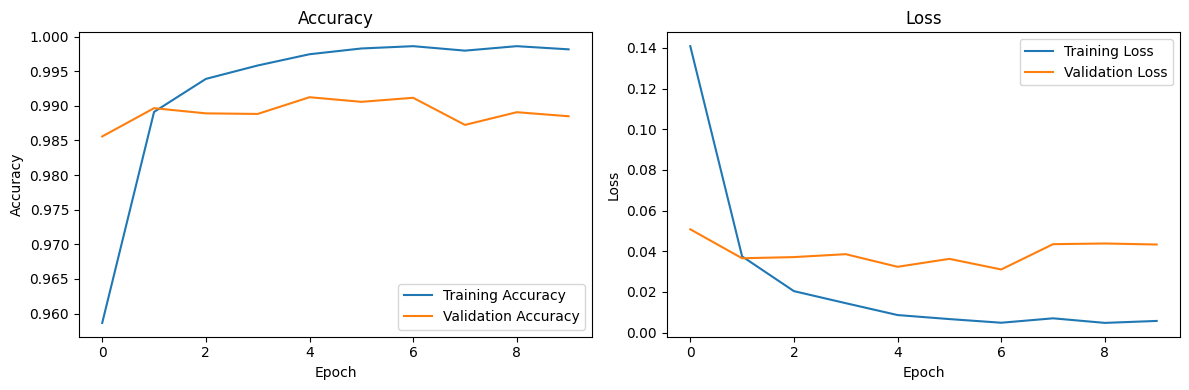

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LayerNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 載入MNIST數據集並預處理
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 建立CNN模型，包含層正規化
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    LayerNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    LayerNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    LayerNormalization(),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 設置回調
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# 訓練CNN模型並記錄訓練過程
history = cnn_model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2,
                        callbacks=[early_stopping, model_checkpoint])

# 評估CNN模型
cnn_score = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test Loss: {cnn_score[0]}, Test Accuracy: {cnn_score[1]}")

# 繪製精準度和損失函數的變化曲線
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
